### Praca domowa 2
#### Paweł Fijałkowski 
##### MiNI PW

Aim of presented document is to familiarize reader with diffrent data transformation methods, such as encoding or data shortcomings handling. Several examples are provided within `Zadanie 1` and `Zadanie 2` scope.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ssl
import random
from category_encoders.target_encoder import TargetEncoder
from category_encoders import OneHotEncoder, SumEncoder, MEstimateEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
ssl._create_default_https_context = ssl._create_unverified_context
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1")

In [3]:
df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


### Zadanie 1

In [59]:
df["it_location"] = df["it_location"].str.lower()
len(df["it_location"].unique())

7903

Quite a lot, OHE might not be by far the best idea.

In [5]:
encoder = TargetEncoder()
df_target = df.copy()
df_target['it_location_encoded'] = encoder.fit_transform(df['it_location'], df['price'])
df_target

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,it_location_encoded
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,warszawa,Komputery,84.132898
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,warszawa,"Odzież, Obuwie, Dodatki",84.132898
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,leszno,Dom i Ogród,64.883187
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,wola krzysztoporska,Książki i Komiksy,35.433365
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,białystok,"Odzież, Obuwie, Dodatki",73.772916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,kraśnik,RTV i AGD,26.346402
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,dzierżoniów,Uroda,63.645927
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,supraśl,"Odzież, Obuwie, Dodatki",18.682800
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,poznań,Dla Dzieci,104.254805


In [64]:
one_hot = OneHotEncoder(cols="main_category",use_cat_names=True)
res = one_hot.fit_transform(df["main_category"])

In [ ]:
res

Now, we will introduce 2 diffrent ways of encoding categorical data.
In brief, `MEstimateEncoder` is a version of `TargetEncoder` with probability parameter (tunable) and `SumEncoder` is sum contrast coding. Specifics can be found [here](https://contrib.scikit-learn.org/category_encoders/mestimate.html) and [here](https://contrib.scikit-learn.org/category_encoders/sum.html).

In [61]:
encoder_maker = lambda encoder, col, target: encoder.fit_transform(df[col],df[target])
sum_encoder_result = encoder_maker(SumEncoder(),"main_category","price")
mestimate_result = encoder_maker(MEstimateEncoder(m=10),"main_category","price")

In [9]:
sum_encoder_result

,intercept,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,...,main_category_16,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420016,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420017,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420018,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
mestimate_result

,main_category
0,121.779033
1,75.858225
2,72.435235
3,25.072207
4,75.858225
...,...
420015,107.519176
420016,28.145898
420017,75.858225
420018,71.207717


### Zadanie 2

In [33]:
columns_pick = ["price", "it_seller_rating","it_quantity"]
df_partial = df[columns_pick].sample(frac=0.1,random_state=37)
df_partial_no_inputing = df_partial.copy()
df_partial.loc[df_partial.sample(frac=0.1,random_state=37).index,"it_seller_rating"] = np.nan
df_partial.isnull().sum()

price                  0
it_seller_rating    4200
it_quantity            0
dtype: int64

In [34]:
transformer = KNNImputer(n_neighbors=5)

In [35]:
df_partial["it_seller_rating"] = transformer.fit_transform(df_partial)

In [36]:
df_partial.isnull().sum()

price               0
it_seller_rating    0
it_quantity         0
dtype: int64

In [38]:
rmse = lambda x,y: np.sqrt(mean_squared_error(x,y))
rmse(df_partial_no_inputing["it_seller_rating"],df_partial["it_seller_rating"])

41831.91944925188

Perform a experiment showing standard deviation of resultant distance from orignal, non-filled data

In [55]:
def how_far(n):
    result = list()
    for _ in range(n):
        columns_pick = ["price", "it_seller_rating","it_quantity"]
        df_partial = df[columns_pick].sample(frac=0.1)
        df_partial_no_inputing = df_partial.copy()
        df_partial.loc[df_partial.sample(frac=0.1).index,"it_seller_rating"] = np.nan
        transformer = KNNImputer(n_neighbors=3)
        df_partial["it_seller_rating"] = transformer.fit_transform(df_partial)
        result.append(rmse(df_partial_no_inputing["it_seller_rating"],df_partial["it_seller_rating"]))
    return result

In [56]:
result = how_far(5)
print(f'Std: {np.std(result)} Mean: {np.mean(result)}]')


Std: 621.431725038081 Mean: 41992.42129034343]


<AxesSubplot:>

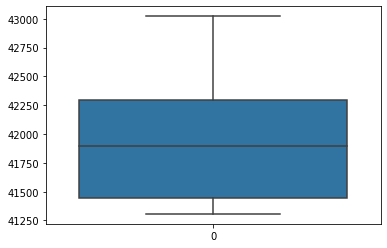

In [57]:
sns.boxplot(data = result)